In [72]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [73]:
class Model(nn.Module):
    
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        #layers:
        
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)         
        self.out = nn.Linear(h2, out_features)
        
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x
        

In [74]:
torch.manual_seed(32)
model = Model()

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [76]:
df = pd.read_csv("data\iris.csv")

In [77]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [78]:
X = df.drop('target', axis=1)
y = df['target']

In [79]:
X = X.values
y = y.values

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)


In [81]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


In [82]:
y_train = torch.LongTensor(y_train)

In [83]:
y_test = torch.LongTensor(y_test)

In [84]:
criterion = nn.CrossEntropyLoss()

In [85]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [88]:
epochs = 100

losses = []

for i in range(epochs):
    
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i %10 ==0:
        print(f'epoch {i} and loss is: {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

epoch 0 and loss is: 0.04294317588210106
epoch 10 and loss is: 0.04276157543063164
epoch 20 and loss is: 0.042631860822439194
epoch 30 and loss is: 0.04250968247652054
epoch 40 and loss is: 0.04239756241440773
epoch 50 and loss is: 0.04229384660720825
epoch 60 and loss is: 0.04219681769609451
epoch 70 and loss is: 0.04210853576660156
epoch 80 and loss is: 0.042027462273836136
epoch 90 and loss is: 0.04195332154631615


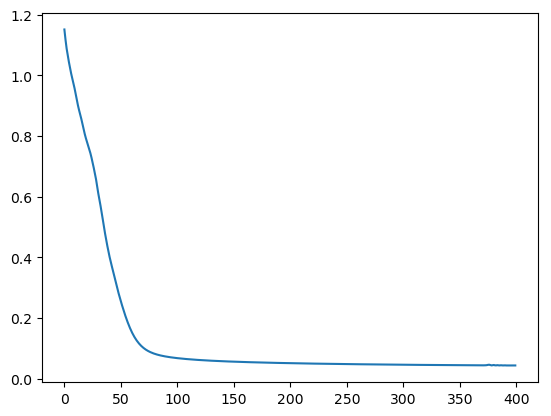

In [87]:
plt.plot(range(epochs), losses)

In [89]:
with torch.no_grad():
    
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [90]:
loss

tensor(0.0472)

In [92]:
correct = 0

with torch.no_grad():
    
    for i , data in enumerate(X_test):
        
        y_val = model.forward(data)
        
        print(f'{i+1}.) {str(y_val)}')
        
        if y_val.argmax().item() == y_test[i]:
            correct+=1

print(correct)

1.) tensor([-3.4721,  8.1240, -1.2704])
2.) tensor([-3.7452,  8.7798, -1.3779])
3.) tensor([  9.5497,   1.3695, -14.0038])
4.) tensor([-6.1660,  7.7383,  1.9410])
5.) tensor([-10.9428,   5.4112,   8.6260])
6.) tensor([-15.5597,   2.5163,  15.1842])
7.) tensor([  9.1988,   1.7410, -13.8072])
8.) tensor([ 10.2834,   1.2066, -14.8504])
9.) tensor([-11.3469,   5.0216,   9.1982])
10.) tensor([-14.6601,   3.3837,  13.7766])
11.) tensor([-15.2717,   3.0039,  14.6325])
12.) tensor([  9.5997,   1.1137, -13.8530])
13.) tensor([-14.5110,   2.7700,  13.9050])
14.) tensor([-6.0309,  7.5714,  1.8775])
15.) tensor([-12.1940,   4.4464,  10.4387])
16.) tensor([-3.4528,  8.6172, -1.5697])
17.) tensor([-8.7082,  5.7915,  5.8361])
18.) tensor([ 10.4561,   1.2301, -15.1023])
19.) tensor([-6.0212,  7.5276,  1.8188])
20.) tensor([-12.7903,   5.1387,  10.7220])
21.) tensor([ 10.0374,   1.2298, -14.5398])
22.) tensor([ 10.5354,   1.5147, -15.4514])
23.) tensor([-14.7802,   3.0467,  14.0769])
24.) tensor([ 10.0

In [97]:
torch.save(model.state_dict(), 'my_iris_model2.pt')

In [98]:
new_model = Model()

new_model .load_state_dict(torch.load('my_iris_model.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [99]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [104]:
testIris = torch.tensor([5.6,3.7,2.2,0.5])

In [105]:
with torch.no_grad():
    print(new_model(testIris))
    

tensor([[  8.0709,   2.9160, -12.9737],
        [-26.1402,  -0.0880,  28.1775]])
